In [1]:
from scipy.optimize import minimize
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

In [3]:
# one-dimensional exhaustive searh method
def ex_s(f, epsilon, boundares):
    l, r = boundares[0], boundares[1]
    n = int((r - l) / epsilon + 1)
    dx = (r - l) / n
    x_min = l
    f_min = f(x_min)
    for k in range(1, n+1):
        x = l + k * dx
        func = f(x)
        if func < f_min:
            f_min = func
            x_min = x
    print('Number of 𝑓-calculations:', n + 1)
    print('Number of iterations:', n)
    return x_min

In [4]:
# one-dimensional dichotomy method
def dich_m(f, epsilon, boundares, delta = None):
    n_iter = 0
    n_func = 0
    a, b = boundares[0], boundares[1]
    if not delta:
        delta = epsilon / 2
    while (b - a) > epsilon:
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        if f(x1) <= f(x2):
            b = x2
        else:
            a = x1
        n_iter += 1
        n_func += 2
    print('Number of 𝑓-calculations:', n_func)
    print('Number of iterations:', n_iter)
    return (a + b) / 2


In [5]:
# one-dimensional golden section method
def gold_sect(f, epsilon, boundares):
    n_iter = 0
    n_func = 0
    a, b = boundares
    delta = (3 - 5**0.5) / 2
    x1 = a + delta * (b - a)
    x2 = b - delta * (b - a) 
    f1 = f(x1)
    f2 = f(x2)
    n_func += 2
    while (b - a) > epsilon:
        if f1 <= f2:
            b = x2
            x2 = x1
            x1 = a + delta * (b - a)
            f2 = f1
            f1 = f(x1)
            n_func += 1
        else:
            a = x1
            x1 = x2
            x2 = b - delta * (b - a)
            f1 = f2
            f2 = f(x2)
            n_func += 1
        n_iter += 1
    
    return (a + b) / 2, n_func, n_iter



In [6]:
# two-dimensional exhaustive searh method
def ex_s_2d(f, epsilon, boundares):
    x1, x2 = boundares[0] 
    y1, y2 = boundares[1]
    nx = int((x2 - x1) / epsilon + 1)
    ny = int((y2 - y1) / epsilon + 1)
    dx = (x2 - x1) / nx
    dy = (y2 - y1) / ny
    x_min = x1
    y_min = y1
    f_min = f(x_min, y_min)
    for i in range(nx+1):
        for j in range(ny+1):
            x = x1 + i * dx
            y = y1 + j * dy
            func = f(x, y)
            if func < f_min:
                f_min = func
                x_min = x
                y_min = y
    
    print('Number of 𝑓-calculations:', (nx + 1) * (ny + 1))
    print('Number of iterations:', (nx + 1) * (ny + 1))
    
    return [x_min, y_min]

In [7]:
# two-dimensional Gauss method
def gaus_m(f, epsilon, boundares, initial_x_y=(0, 1)):
    n_iter = 0
    n_func = 0
    
    x, y = initial_x_y
    
    while True:
        x_old = x
        y_old = y
        x, fun, it = gold_sect(lambda x: f(x, y_old), epsilon, boundares[0])
        n_iter += 1
        n_func += fun
        y, fun, it = gold_sect(lambda y: f(x, y), epsilon, boundares[1])
        n_iter += 1
        n_func += fun
        if abs(x-x_old) < epsilon and abs(y-y_old) < epsilon:
            break
    print('Number of 𝑓-calculations:', n_func)
    print('Number of iterations:', n_iter)
    return [x, y]


In [8]:
#difinition of different functions
def f1(x):
    return x**3

def f2(x):
    return np.abs(x - 0.2)

def f3(x):
    return x * np.sin(1 / x)

One-dimensional minimization by different functions:

In [9]:
eps = 0.001
ex_s(f3, eps, (0.001, 1))

Number of 𝑓-calculations: 1001
Number of iterations: 1000


0.22277800000000003

In [10]:
dich_m(f3, eps, (0.001, 1))

Number of 𝑓-calculations: 22
Number of iterations: 11


0.04244787597656249

In [11]:
gold_sect(f3, eps, (0.001, 1))

(0.22259084119572914, 17, 15)

Text(0, 0.5, '$f(x)$')

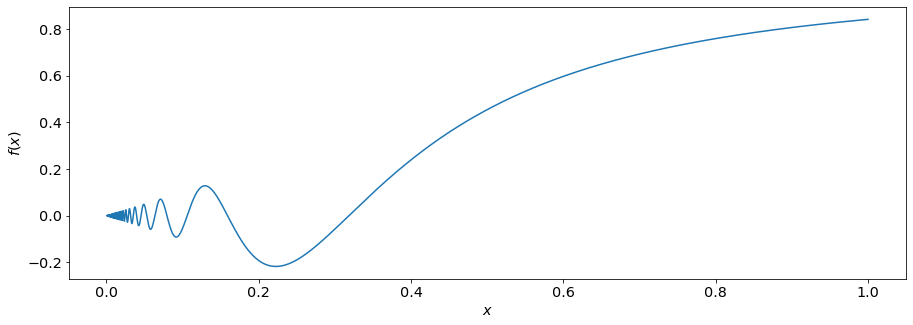

In [12]:
plt.figure(figsize=(15, 5))
x = np.linspace(0.001, 1, 10000)
plt.plot(x, f3(x))
plt.xlabel('$x$')
plt.ylabel('$f(x)$')

In [19]:
#Generation of experemental data
alpha = 0.62
beta = 0.37
x = np.array(range(1, 101)) / 100
delta = np.random.normal(size=100)
y = alpha * x + beta + delta

In [20]:
#import  y from file
y = np.loadtxt('data_y.txt')

In [30]:
#Approximants definition 
def lin_fit(x, a, b):
    return a*x + b

def rat_fit(x, a, b):
    return a / (1 + b * x)

Linear approximation:

In [31]:
def D_lin(a, b):
    return mean_squared_error(lin_fit(x, a, b), y)

def D_lin_NM(params):
    a, b = params
    if a >=0 and a <=1 and b >= 0 and b <=1:
        return mean_squared_error(lin_fit(x, *params), y)
    else:
        return 1000

In [32]:
a_lin_fit = np.zeros(3)
b_lin_fit = np.zeros(3)

In [33]:
#Optimization by brute-force method
a, b = ex_s_2d(D_lin, eps, ((0,1), (0, 1)))
a_lin_fit[0] = a
b_lin_fit[0] = b
a, b

Number of 𝑓-calculations: 1004004
Number of iterations: 1004004


(0.3116883116883117, 0.6193806193806194)

In [34]:
#Optimization by Gauss method
a, b = gaus_m(D_lin, eps, ((0, 1), (0, 1)))
a_lin_fit[1] = a
b_lin_fit[1] = b
a, b

Number of 𝑓-calculations: 612
Number of iterations: 36


(0.30842387373012625, 0.6210530736291806)

In [35]:
#Optimization by Nelde-Mead method
print(minimize(D_lin_NM, x0=(0, 1), method='Nelder-Mead', options = {'xatol': eps}))
a, b = minimize(D_lin_NM, x0=(0, 1), method='Nelder-Mead', options = {'xatol': eps}).x
a_lin_fit[2] = a
b_lin_fit[2] = b
a, b

 final_simplex: (array([[0.3119764 , 0.61943253],
       [0.31120123, 0.61955831],
       [0.3113358 , 0.62004039]]), array([0.979221  , 0.97922101, 0.97922107]))
           fun: 0.9792210034505194
       message: 'Optimization terminated successfully.'
          nfev: 83
           nit: 44
        status: 0
       success: True
             x: array([0.3119764 , 0.61943253])


(0.3119763987207042, 0.6194325271269168)

In [36]:
labels = [f"Brute-force: $y={round(a_lin_fit[0], 3)} \cdot x +{round(b_lin_fit[0], 3)}$", 
          f"Gauss method: $y={round(a_lin_fit[1], 3)} \cdot x +{round(b_lin_fit[1], 3)}$",
         f"Nelder-Mead: $y={round(a_lin_fit[2], 3)} \cdot x +{round(b_lin_fit[2], 3)}$"]

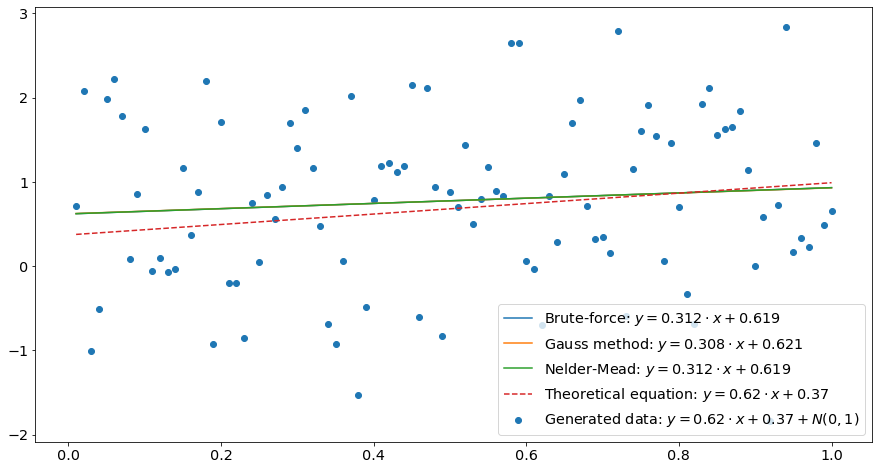

In [37]:
plt.figure(figsize=(15, 8))
plt.scatter(x, y, label=f"Generated data: $y={alpha} \cdot x +{beta} + N(0,1)$")
for a, b, label in zip(a_lin_fit, b_lin_fit, labels):
    plt.plot(x, lin_fit(x, a, b), label=label)
plt.plot(x, lin_fit(x, alpha, beta), linestyle='--', label=f"Theoretical equation: $y={alpha} \cdot x +{beta}$")

plt.legend()

In [39]:
#MSE for different methods
for i in range(3):
    print(D_lin(a_lin_fit[i], b_lin_fit[i]))

0.9792209973874785
0.9792216541703058
0.9792210034505194


Rational approximation:

In [40]:
a_rat_fit = np.zeros(3)
b_rat_fit = np.zeros(3)

In [41]:
def D_rat(a, b):
    return mean_squared_error(rat_fit(x, a, b), y)

def D_rat_NM(params):
    a, b = params
    if a >=0 and a <=1 and b >= -1 and b <= 1:
        return mean_squared_error(rat_fit(x, *params), y)
    else:
        return 1000

In [42]:
#Optimization by brute-force method
%time a, b = ex_s_2d(D_rat, eps, ((0,1), (-0.999, 1)))
a_rat_fit[0] = a
b_rat_fit[0] = b
a, b

Number of 𝑓-calculations: 2005002
Number of iterations: 2005002
Wall time: 3min 51s


(0.6493506493506493, -0.307346)

In [43]:
#Optimization by Gauss method
a, b = gaus_m(D_rat, eps, ((0, 1), (-0.999, 1)))
a_rat_fit[1] = a
b_rat_fit[1] = b
a, b

Number of 𝑓-calculations: 630
Number of iterations: 36


(0.650923032490957, -0.3047520864564152)

In [44]:
#Optimization by Nelder-Mead method

print(minimize(D_rat_NM, x0=(0.5, 0.5), method='Nelder-Mead', options = {'xatol': eps}))
a, b = minimize(D_rat_NM, x0=(0.5, 0.5), method='Nelder-Mead', options = {'xatol': eps}).x
a_rat_fit[2] = a
b_rat_fit[2] = b
a, b

 final_simplex: (array([[ 0.6497928 , -0.3067439 ],
       [ 0.65015688, -0.30600283],
       [ 0.64967741, -0.30614055]]), array([0.9797606 , 0.9797606 , 0.97976071]))
           fun: 0.979760596382016
       message: 'Optimization terminated successfully.'
          nfev: 65
           nit: 32
        status: 0
       success: True
             x: array([ 0.6497928, -0.3067439])


(0.649792801948932, -0.3067438959929877)

In [45]:
labels = [f"Brute-force: $y={round(a_rat_fit[0], 3)} / (1 +{round(b_rat_fit[0], 3)} \cdot x)$", 
          f"Gauss method: $y={round(a_rat_fit[1], 3)} / (1 +{round(b_rat_fit[1], 3)} \cdot x)$",
         f"Nelder-Mead: $y={round(a_rat_fit[2], 3)} / (1 +{round(b_rat_fit[2], 3)} \cdot x)$"]

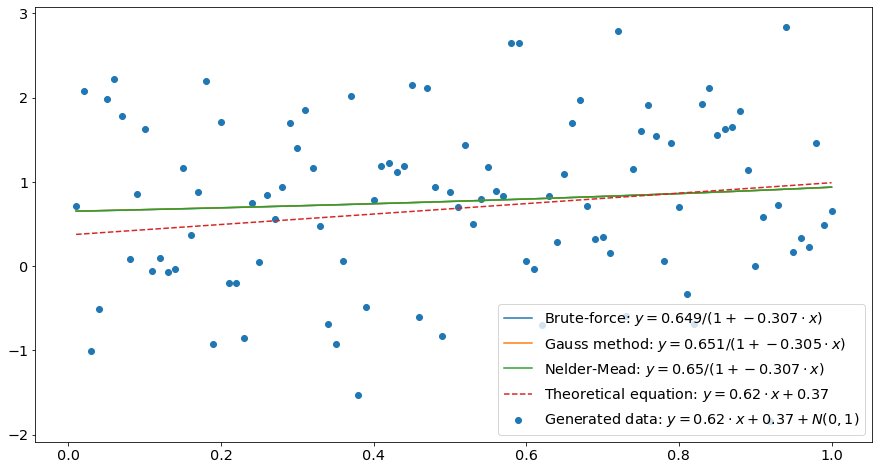

In [46]:
plt.figure(figsize=(15, 8))
plt.scatter(x, y, label=f"Generated data: $y={alpha} \cdot x +{beta} + N(0,1)$")
for a, b, label in zip(a_rat_fit, b_rat_fit, labels):
    plt.plot(x, rat_fit(x, a, b), label=label)
plt.plot(x, lin_fit(x, alpha, beta), linestyle='--', label=f"Theoretical equation: $y={alpha} \cdot x +{beta}$")

plt.legend()

In [47]:
#MSE for different methods
for i in range(3):
    print(D_rat(a_rat_fit[i], b_rat_fit[i]))

0.9797606841727231
0.9797610084833761
0.979760596382016


In [48]:
#export to file
file = open('data_y.txt', 'w')
file.write(' '.join(str(i) for i in y))
file.close()